In [1]:
import pyspark

In [2]:
sc = pyspark.SparkContext()

In [3]:
import random

## 生成10000个随机点

In [4]:
xy = [(random.uniform(35,41),random.uniform(115,120))\
     for i in range(10000)]

In [5]:
poly1 = 'POLYGON((116 39,116 32,105 37,111 42,116 39))'

In [6]:
import ogr

In [7]:
geom = ogr.CreateGeometryFromWkt(poly1)

In [8]:
rdd = sc.parallelize(xy)

## 用filter（过滤）算子，将被包含的点都筛选出来

In [36]:
def myfilter(xy,geom):
    pnt = "POINT({0} {1})".format(xy[1],xy[0])
    return geom.Contains(ogr.CreateGeometryFromWkt(pnt))

In [39]:
res = rdd.filter(lambda xy:myfilter(xy,geom)).collect()

## 筛选出来了1449个点

In [49]:
len(res)

1449

## 查看原始数据

(30, 45)

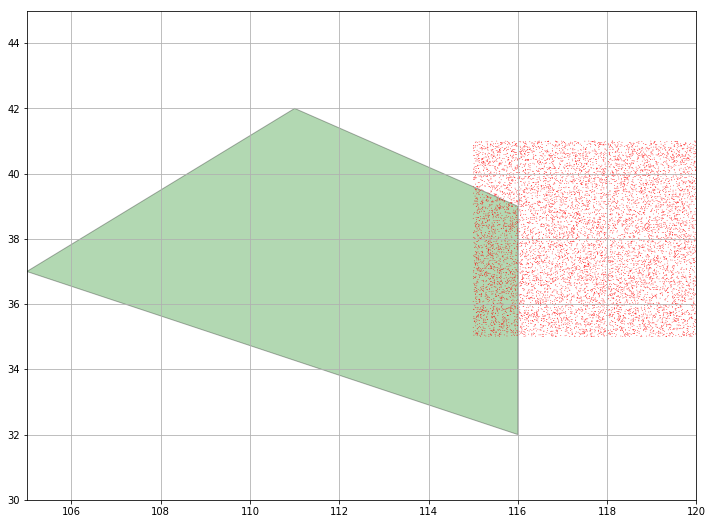

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,9)) 
ax = fig.gca() 
ax.grid(alpha= 1)
p = poly1.split("((")[1].split("))")[0].split(",")
pl = []
for coord in p:
    pnt = coord.split(" ")
    pl.append([float(pnt[0]),float(pnt[1])])
    mpoly = plt.Polygon(pl,ec = '#000000',fc="green", alpha = 0.3)
ax.add_patch(mpoly)

for pnt in xy:
    pt = plt.Circle([float(pnt[1]),float(pnt[0])], 0.01,fc='#FF0000')
    ax.add_patch(pt)

ax.set_autoscale_on= False
ax.set_xlim(105,120)
ax.set_ylim(30,45)

## 查看被筛选之后的数据

(30, 45)

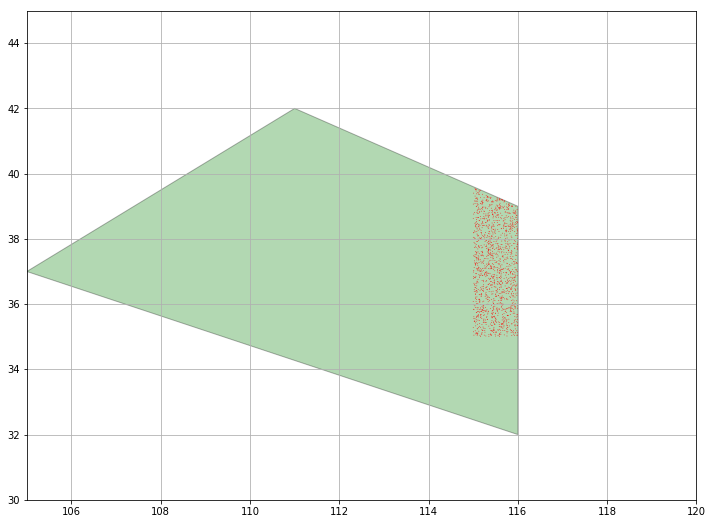

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,9)) 
ax = fig.gca() 
ax.grid(alpha= 1)
p = poly1.split("((")[1].split("))")[0].split(",")
pl = []
for coord in p:
    pnt = coord.split(" ")
    pl.append([float(pnt[0]),float(pnt[1])])
    mpoly = plt.Polygon(pl,ec = '#000000',fc="green", alpha = 0.3)
ax.add_patch(mpoly)
for pnt in res:
    pt = plt.Circle([float(pnt[1]),float(pnt[0])], 0.01,fc='#FF0000')
    ax.add_patch(pt)

ax.set_autoscale_on= False
ax.set_xlim(105,120)
ax.set_ylim(30,45)